### Many-body Entanglement and Tensor Networks
Tutorials based on the 2017 Perimeter Scholar International Condensed Matter Review course taught by Guifre Vidal

# <span style="color:#0C45A9">Python tutorial 2 </span>

In this notebook we will first solve the ground-state energy of the quantum Ising model for 3 spins through exact diagonalisation of the Hamiltonian. Secondly, we will look at a larger quantum Ising system and explore the energy levels. Finally we will slightly modify our Hamiltonian parameters and 

## 2.1. Quantum Ising model on $N=3$ spins

The Hamiltonian (with PBC) for this system is: $H = \sigma^x_1 \otimes \sigma^x_2 + \sigma^x_2 \otimes \sigma^x_3 +  \sigma^x_3 \otimes \sigma^x_1 + h\left( \sigma^z_1 + \sigma^z_2 + \sigma^z_3\right) $

### 2.1.1. Builiding the Hamiltonian

In [1]:
import numpy as np

I = np.eye(2) #2x2 identity matrix
II = np.eye(4) #4x4 identity matrix
X = np.array([[0,1],[1,0]]) #Pauli-X
Z = np.array([[1,0],[0,-1]]) #Pauli-Z
XX = np.kron(X,X) 

Let's get the terms of our Hamiltonian

In [2]:
H_XX = np.kron(XX,I) + np.kron(I, XX) + np.kron(X,np.kron(I,X)) #XX terms
H_Z = np.kron(Z,II) + np.kron(I,np.kron(Z,I)) + np.kron(II,Z) #Z terms

### 2.1.2. Ground-state: exact diagonalisation

Get a list of possible values of the magnetic field $h$:

In [ ]:
h_values = np.linspace(0,2,20)

For all the values of $h$, solve by exactly diagonalising and store the ground-state energy $E_0$:

In [7]:
E_0_values = []

for h in h_values:
    H = H_XX + h*H_Z #build the Hamiltonian
    D, U = np.linalg.eig(H)
    E_0_values.append(min(D)) #store the ground-state energy

#### Visualise ground-state energy

/Users/sofiagonzalez/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


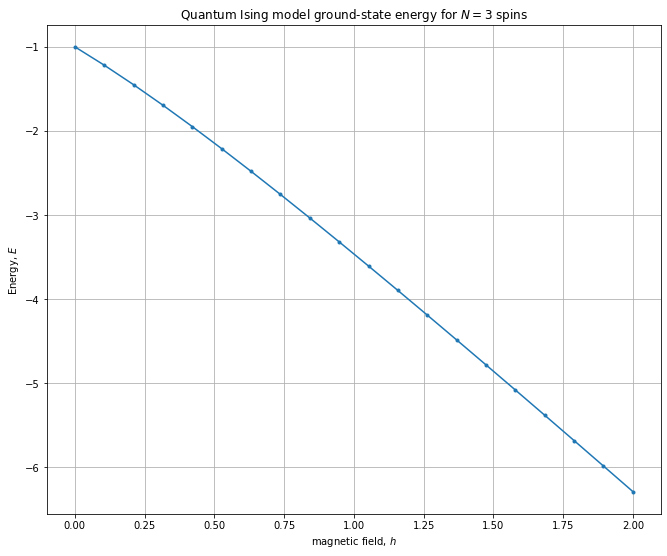

In [10]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.title("Quantum Ising model ground-state energy for $N=3$ spins")
plt.grid()
plt.ylabel("Energy, $E$")
plt.xlabel("magnetic field, $h$")
plt.plot(h_values, E_0_values, ls = '-', marker = '.')
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

## 2.2. Generalisation: Quantum Ising model on $N$ spins

The Ising model general Hamiltonian is: $H_{TFIM} = -\sum_{\langle m,n \rangle} \sigma_m^x\sigma_n^x - h\sum_{m=1}^N\sigma_m^z$.

### 2.2.1. Building the Hamiltonian

We define a function to build the quantum Ising Hamiltonian for $N$ spins. This first builds Hamiltonian for 2 spins and add terms up to $N$. We will limit our calculation to $N\leq10$.

In [ ]:
def qIsingH(N, h, bc = 1): #bc = 1 PBC, =-1 APBC
    I = np.eye(2) #2x2 identity matrix
    X = np.array([[0,1],[1,0]]) #Pauli-X
    Z = np.array([[1,0],[0,-1]]) #Pauli-Z
    XX = np.kron(X,X) 
    H = -XX - h*(np.kron(Z,I) + np.kron(I,Z)) #Hamiltonian for N=2
    
    for n in range(3,(N+1)):
        H = np.kron(H,I)-np.kron(np.eye(2**(n-2)),XX)-h*np.kron(np.eye(2**(n-1)),Z)

    H = H - bc*np.kron(X,np.kron(np.eye(2**(N-2)),X))
    
    return H

### 2.2.2. Energy spectrum: exact diagonalisation

In [ ]:
N=8  # spin chain size N=10 and Nh = 21 takes approx 10 seconds
h_max = 2 # range of magnetic field
h_values = np.linspace(0,h_max,20) #magnetic field values
bc = -1

E_0_values = []
E_spectrums = []

for h in h_values:
    H = qIsingH(N, h, bc) #build the Hamiltonian
    D, U = np.linalg.eig(H)
    E_spectrums.append(np.sort(D))
    E_0_values.append(min(D)) #store the ground-state energy

#### Visualise energy spectrum

In [ ]:
plt.title("Quantum Ising model energy spectrum ~ $N=$%s, bc=%s" %(N,bc))
plt.grid()
plt.ylabel("Energy, $E$")
plt.xlabel("magnetic field, $h$")
plt.plot(h_values, np.array(E_spectrums)[:,0], ls='-', marker='.', lw=2.5, ms=10, c="red", label="ground-state")
for i in range(1, np.shape(E_spectrums)[1]):
    plt.plot(h_values, np.array(E_spectrums)[:,i], ls='-', marker='.', lw=0.9)
plt.legend()
plt.rcParams["figure.figsize"] = (16,8)
plt.show()

### 2.2.3. Different interaction and field terms

We modify our Hamiltonian slightly and change the interaction and field terms such that: $H(\theta) = -\cos \theta \sum \sigma_m^x \sigma_{m+1}^x - \sin\theta \sum \sigma_m^z$

In [ ]:
def qIsingH_theta(N, theta, bc = 1): #bc = 1 PBC, =-1 APBC
    I = np.eye(2) #2x2 identity matrix
    X = np.array([[0,1],[1,0]]) #Pauli-X
    Z = np.array([[1,0],[0,-1]]) #Pauli-Z
    XX = np.kron(X,X) 
    
    H = -np.cos(theta)*XX - np.sin(theta)*(np.kron(Z,I) + np.kron(I,Z)) #Hamiltonian for N=2
    
    for n in range(3,(N+1)):
        H = np.kron(H,I)-np.cos(theta)*np.kron(np.eye(2**(n-2)),XX)- np.sin(theta)*np.kron(np.eye(2**(n-1)),Z)

    H = H - bc*np.cos(theta)*np.kron(X,np.kron(np.eye(2**(N-2)),X))
    
    return H

#### Energy spectrum: exact diagonalisation

In [ ]:
N=8  # spin chain size N=10 and Nh = 21 takes approx 10 seconds
theta_max = np.pi/2 # range of magnetic field
theta_values = np.linspace(0,theta_max,20) #magnetic field values
bc = -1

E_0_values = []
E_spectrums = []

for theta in theta_values:
    H = qIsingH_theta(N, theta, bc) #build the Hamiltonian
    D, U = np.linalg.eig(H)
    E_spectrums.append(np.sort(D))
    E_0_values.append(min(D)) #store the ground-state energy

#### Visualise energy spectrum

In [ ]:
plt.title("Quantum Ising model energy spectrum ~ $N=$%s, bc=%s" %(N,bc))
plt.grid()
plt.ylabel("Energy, $E$")
plt.xlabel("theta, $\theta$")
plt.plot(theta_values, np.array(E_spectrums)[:,0], ls='-', marker='.', lw=2.5, ms=10, c="red", label="ground-state")
for i in range(1, np.shape(E_spectrums)[1]):
    plt.plot(theta_values, np.array(E_spectrums)[:,i], ls='-', marker='.', lw=0.9)
plt.legend()
plt.rcParams["figure.figsize"] = (16,8)
plt.show()